In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


# Load the datasets and review size, types of clmns, clmn names, # of nans, etc

In [2]:
#import train and test datasets
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
#combine train and test to df.  data cleaning and feature engineering will be done on both datasets (e.g. imputing nans, 
#dropping clmns, creating new clmns)
train['dataset'] = 'train'
test['dataset'] = 'test'
df = train.append(test)

print(train.columns)
print(train.info())
df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'dataset'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  dataset      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
#compare survival btwn men and women
women = train.loc[train.Sex == 'female'].Survived
female_survival_rate = sum(women)/len(women)
print('Female survival rate: ' + str(sum(women)/len(women)))

men = train.loc[train.Sex =='male'].Survived
male_survival_rate = sum(men)/len(men)
print('Male survival rate: ' + str(sum(men)/len(men)))

print('Woemn were ' + str(round((female_survival_rate/male_survival_rate), 1)) + 'X more likely to survive than men.')

Female survival rate: 0.7420382165605095
Male survival rate: 0.18890814558058924
Woemn were 3.9X more likely to survive than men.


# Start to visualize the data to understand the distribution of continuous numerical data, relationship btwn features, and surival rates based on one or more features
This will inform how nans are imputed, data is cleaned, importance of features, and feature engineering

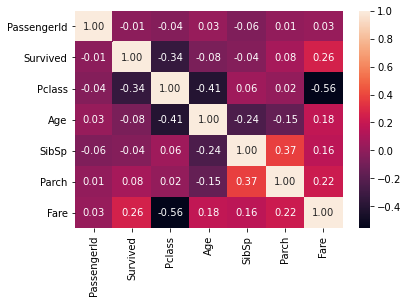

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
#begin visualizing data to understand distribution of features and relationships btwn features
sns.heatmap(df.corr(), annot=True, fmt='.2f')

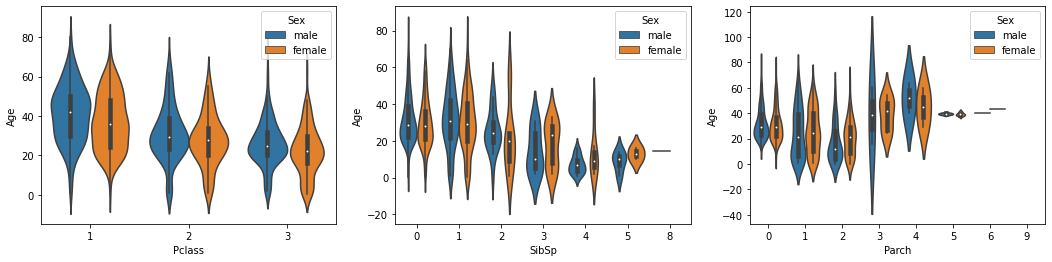

In [6]:
#look at age distribution of different features (pclass, sibsp, parch)
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex')

plt.subplot(1,3,2)
sns.violinplot(data=df, x='SibSp', y='Age', hue='Sex')

plt.subplot(1,3,3)
sns.violinplot(data=df, x='Parch', y='Age', hue='Sex')
plt.show()

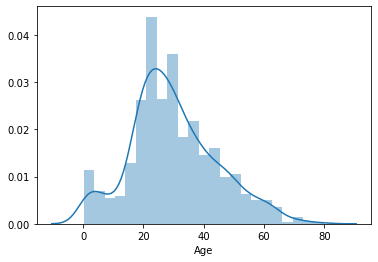

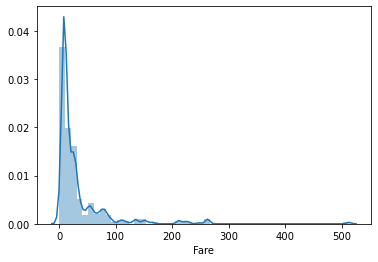

<Figure size 432x288 with 0 Axes>

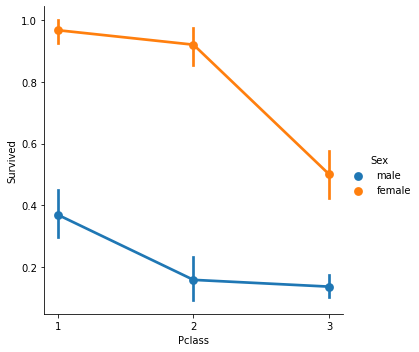

<Figure size 432x288 with 0 Axes>

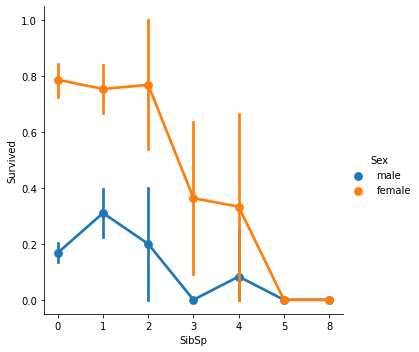

<Figure size 432x288 with 0 Axes>

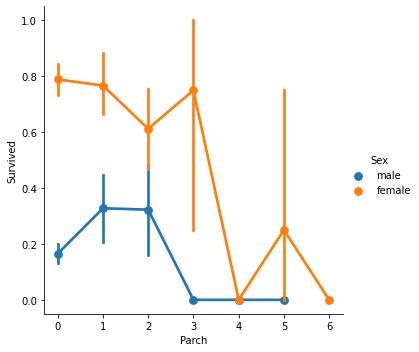

<Figure size 432x288 with 0 Axes>

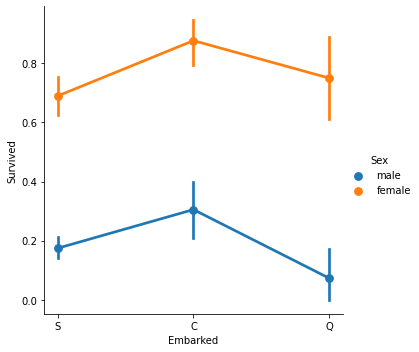

<Figure size 432x288 with 0 Axes>

In [7]:
continuous = ['Age','Fare']
categorical = ['Pclass', 'SibSp','Parch', 'Embarked']
#check distribution of age and fare
for i in continuous:
    sns.distplot(df[i])
    plt.show()
    plt.clf()
#compare survival rates of categorical features, broken out by sex
for i in categorical:
    sns.catplot(data=train, x=i, y='Survived', hue='Sex',kind='point')
    plt.plot()
    plt.show()
    plt.clf()

In [8]:
print(df.isna().sum())
print(df.Embarked.value_counts())
#fill nan for fare w/ median, and embarked w/ S (port w/ highest # of departures)
df.fillna(value={'Fare':df.Fare.median(), 'Embarked':'S'}, inplace=True)
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dataset           0
dtype: int64
S    914
C    270
Q    123
Name: Embarked, dtype: int64


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dataset           0
dtype: int64

In [9]:
#survival rate by pclass
pd.pivot_table(data=df, columns='Pclass', index='Survived', values='Name', aggfunc='count')

Pclass,1,2,3
Survived,,,
0.0,80,97,372
1.0,136,87,119


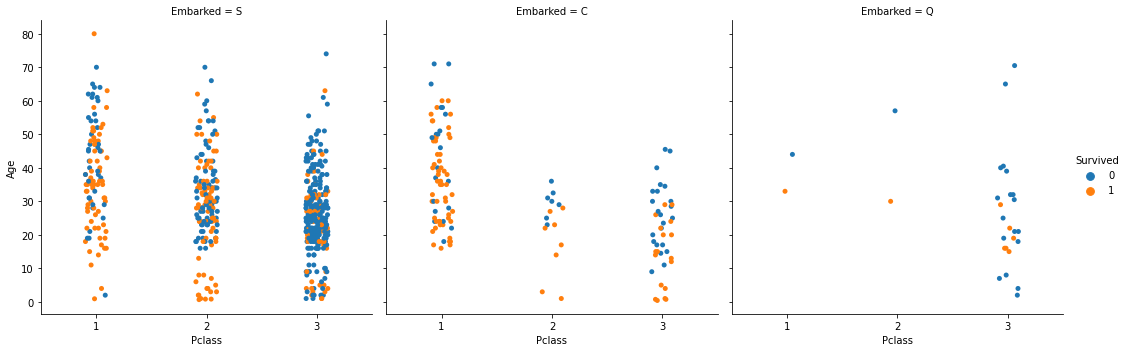

In [10]:
#visualize survival at the three ports, by passenger class and age
sns.catplot(x='Pclass', y='Age', data=train, hue='Survived', col='Embarked')
plt.show()

# Start to impute data and create new features by grouping data, extracting titles, and predicting age
The old adage "women and children first" appears to have some value for this data.  More important to have high accuracy for a person's age group rather than a continuous numerical result for age.  Understanding if a passenger is a child or middle aged or elderly will better inform the model than having high accuracy for age (eg. 24+/-3yrs).

In [11]:
#create new feature w/ just cabin letter to narrow dimensionality
df['cabin_letter'] = df.Cabin.apply(lambda x: str(x)[0])
#only one passenger in cabin T, so replace it w/ common cabin C to reduce dimensionality
df.cabin_letter = df.cabin_letter.replace('T', 'C')

df.cabin_letter.value_counts()

n    1014
C      95
B      65
D      46
E      41
A      22
F      21
G       5
Name: cabin_letter, dtype: int64

In [12]:
#look at survival rate by cabin letter.  is cabin a useful feature? Yes, passengers in D, E, and B have a >70% survival rate vs
#other cabins (<60%)
pd.pivot_table(data=df, columns='cabin_letter', index='Survived', values='Name', aggfunc='count')

cabin_letter,A,B,C,D,E,F,G,n
Survived,,,,,,,,
0.0,8,12,25,8,8,5,2,481
1.0,7,35,35,25,24,8,2,206


In [13]:
#split fare into groups
fare_labels = ['fare_q1', 'fare_q2', 'fare_q3', 'fare_q4']
df['fare_grouped'] = pd.qcut(df.Fare, 4, labels=fare_labels)

[]

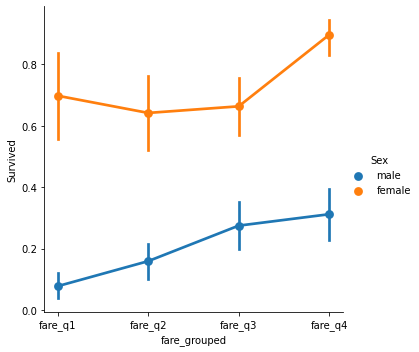

In [14]:
#how does fare impact survival
sns.catplot(data=df, x='fare_grouped', y='Survived', hue='Sex', kind='point')
plt.plot()

In [15]:
#create new feature for family size that combines Parc and SibSp
df['family_size'] = df.Parch + df.SibSp
pd.pivot_table(data=df, columns='family_size', index='Survived', values='Name', aggfunc='count')

family_size,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0.0,374.0,72.0,43.0,8.0,12.0,19.0,8.0,6.0,7.0
1.0,163.0,89.0,59.0,21.0,3.0,3.0,4.0,NaN,NaN


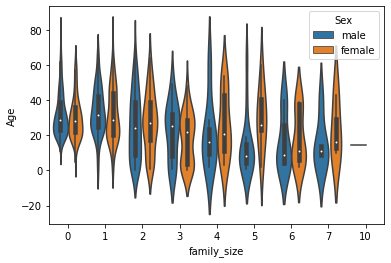

In [16]:
#visualize age dist of diff family sizes
sns.violinplot(data=df, x='family_size', y='Age', hue='Sex')

In [17]:
#create Title feature by splitting the Name clmn
df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Lady              1
Jonkheer          1
Sir               1
Don               1
Dona              1
Capt              1
the Countess      1
Name: Title, dtype: int64

In [18]:
#examine breakdown between title and survival rate
pd.pivot_table(df, columns='Title', index='Survived', values='Name', aggfunc='count')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [19]:
#consolidate titles
#lady, mlle, mme, ms, and countess all had 1 pass each and all survived so can be grouped together as female_title
#capt, don, jonkheer had 1 pass each and all died. all rev died so add that- male_title_dead
#dr, col, major had 50% survive rate. one sir survived, but add him to 50/50 group - male_title_fifty

female_title = {'Lady':'female_title', 'Mlle':'female_title', 'Mme':'female_title', 
                'Ms':'female_title', 'the Countess':'female_title', 'Dona':'female_title'}
male_title_dead = {'Capt':'male_title_dead', 'Jonkheer':'male_title_dead', 'Don':'male_title_dead', 'Rev':'male_title_dead'}
male_title_fifty = {'Dr':'male_title_fifty', 'Col':'male_title_fifty', 'Major':'male_title_fifty', 'Sir':'male_title_fifty'}
df['title_grouped'] = df['Title'].replace(female_title).replace(male_title_dead).replace(male_title_fifty)
df.title_grouped.value_counts()

Mr                  757
Miss                260
Mrs                 197
Master               61
male_title_fifty     15
male_title_dead      11
female_title          8
Name: title_grouped, dtype: int64

In [20]:
#age by title. Can title help predict age?
df.groupby(['Title']).Age.median()

Title
Capt            70.0
Col             54.5
Don             40.0
Dona            39.0
Dr              49.0
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           4.0
Miss            22.0
Mlle            24.0
Mme             24.0
Mr              29.0
Mrs             35.5
Ms              28.0
Rev             41.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [21]:
#age by title_grouped. Can the group of titles help predict age?
df.groupby(['title_grouped']).Age.median()

title_grouped
Master               4.0
Miss                22.0
Mr                  29.0
Mrs                 35.5
female_title        28.0
male_title_dead     41.0
male_title_fifty    49.5
Name: Age, dtype: float64

In [22]:
#fill age for passengers w/ title Master
master_age = df[df.Title == 'Master'].Age.mean()
df.loc[(df.Age.isnull()) & (df.Title == 'Master'), 'Age'] = master_age
df.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age               255
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            0
dataset             0
cabin_letter        0
fare_grouped        0
family_size         0
Title               0
title_grouped       0
dtype: int64

In [23]:
#estimate age by grouping sex and pclass
df.groupby(['Sex', 'Pclass']).Age.median()
for i in ('male', 'female'):
    for j in range(1,4):
        dftemp = df[(df['Sex'] == i) & (df['Pclass'] == j)]['Age'].dropna()
        print(i, j, dftemp.median())
        df.loc[(df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j), 'Age'] = int(dftemp.median())
        
df.isnull().sum()

male 1 42.0
male 2 29.5
male 3 25.0
female 1 36.0
female 2 28.0
female 3 22.0


PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            0
dataset             0
cabin_letter        0
fare_grouped        0
family_size         0
Title               0
title_grouped       0
dtype: int64

In [24]:
#split age into catgorical groups
age_labels = ['age_q1', 'age_q2', 'age_q3', 'age_q4', 'age_q5']
df['age_qcut'] = pd.qcut(df.Age, 5, labels=age_labels)
df['age_cut'] = pd.cut(train.Age, 5, labels=age_labels)
print(pd.cut(train.Age, 5).value_counts())
pd.pivot_table(data=df, columns='age_cut', index='Survived', values='Name', aggfunc='count')
print(pd.qcut(df.Age, 5).value_counts())
pd.pivot_table(data=df, columns='age_qcut', index='Survived', values='Name', aggfunc='count')

(16.336, 32.252]    346
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64
(21.0, 25.0]     353
(0.169, 21.0]    298
(29.0, 40.0]     261
(40.0, 80.0]     255
(25.0, 29.0]     142
Name: Age, dtype: int64


age_qcut,age_q1,age_q2,age_q3,age_q4,age_q5
Survived,,,,,
0.0,119,160,58,101,111
1.0,89,69,36,88,60


[]

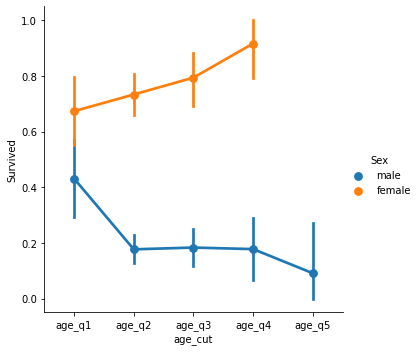

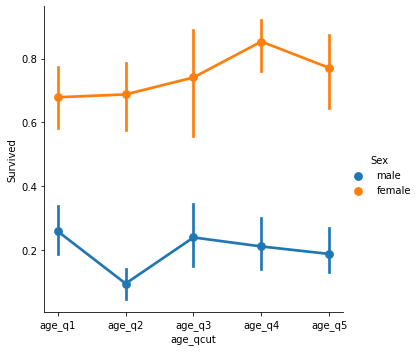

In [25]:
#visualize two diff methods for grouping age and their survival rate
sns.catplot(data=df, x='age_cut', y='Survived', hue='Sex', kind='point')
sns.catplot(data=df, x='age_qcut', y='Survived', hue='Sex', kind='point')
plt.plot()
#qcut results in age groups w/ equivalent survival rates; not an effective grouping method since you need differences between
#groups to inform the model

# Start to build models. Compare performance of random forest, naive bayes, support vector machine, and KNN

In [26]:
#features to include in model
features = ['age_cut', 'fare_grouped', 'Pclass', 'Sex', 'Embarked','title_grouped', 'family_size', 'dataset']
#numerical encoding of categorical features so they can be used in the ML models
df_dummies = pd.get_dummies(df[features])

#split df to train data and test data
x_train = df_dummies[df_dummies.dataset_train == 1].drop(['dataset_test', 'dataset_train'], axis=1)
x_test = df_dummies[df_dummies.dataset_test == 1].drop(['dataset_test', 'dataset_train'], axis=1)

#save feature list for later
feature_list = list(x_train.columns)

y_train = df[df.dataset == 'train'].Survived
y_train.shape

(891,)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=1, max_depth=5)
rfc.fit(x_train_scaled, y_train)
rfc_score = rfc.score(x_train_scaled, y_train)
rfc_score

0.8395061728395061

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_scaled, y_train)
knn_score = knn.score(x_train_scaled, y_train)

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)
nb_score = nb.score(x_train_scaled, y_train)

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_scaled, y_train)
svc_score = svc.score(x_train_scaled, y_train)

In [32]:
baseline_scores = [rfc_score, knn_score, svc_score, nb_score]
baseline_scores

[0.8395061728395061,
 0.8664421997755332,
 0.8406285072951739,
 0.7946127946127947]

# Improve models w/ hyperparameter tuning

In [33]:
#use grid/random search to improve baseline models by exploring hyperparameter space
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [34]:
#simple fxn that returns the best score and the corresponding parameters of the grid search
def clf_performance(model_name, classifier):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Params: ' +str(classifier.best_params_))

In [35]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors' :[3,5,7],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_knn = clf_knn.fit(x_train_scaled, y_train)
clf_performance('KNN', best_clf_knn)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.4s


KNN
Best Score: 0.815931203314293
Best Params: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.9s finished


In [36]:
svc2 = SVC()
param_grid = [{'kernel' : ['rbf'],'gamma': [.1, .5, 1, 2, 5, 10],'C':[.1, 1, 10, 100, 1000]},
              {'kernel' : ['linear'], 'C':[.1, 1, 10, 100, 1000]},
              {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C':[.1,1,10,100,1000]}]
clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_svc = clf_svc.fit(x_train_scaled, y_train)
clf_performance('SVC', best_clf_svc)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.5s


SVC
Best Score: 0.8260184545853996
Best Params: {'C': 1, 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  3.7min finished


In [37]:
rfc2 = RandomForestClassifier()
param_grid = {'n_estimators': [100, 500, 1000],
             'bootstrap':[True, False],
             'max_depth':[3,5,10,20,50, 75],
             'max_features':['auto', 'sqrt'],
             'min_samples_leaf':[1,2,4,8],
             'min_samples_split':[2,5,10]}
clf_rfc = RandomizedSearchCV(rfc, param_distributions=param_grid, n_iter=100, cv=5, verbose=True, n_jobs=-1)
best_clf_rfc = clf_rfc.fit(x_train_scaled, y_train)
clf_performance('RFC', best_clf_rfc)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.9min finished


RFC
Best Score: 0.8293955181721173
Best Params: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 75, 'bootstrap': True}


In [38]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: title_grouped_Mr     Importance: 0.2356
Variable: Sex_female           Importance: 0.1757
Variable: Sex_male             Importance: 0.1305
Variable: Pclass               Importance: 0.1252
Variable: family_size          Importance: 0.0685
Variable: title_grouped_Mrs    Importance: 0.049
Variable: title_grouped_Miss   Importance: 0.046
Variable: fare_grouped_fare_q4 Importance: 0.0292
Variable: fare_grouped_fare_q1 Importance: 0.0191
Variable: title_grouped_Master Importance: 0.0162
Variable: Embarked_S           Importance: 0.0152
Variable: age_cut_age_q1       Importance: 0.0119
Variable: Embarked_C           Importance: 0.0117
Variable: age_cut_age_q2       Importance: 0.0115
Variable: fare_grouped_fare_q3 Importance: 0.0114
Variable: title_grouped_male_title_dead Importance: 0.0088
Variable: Embarked_Q           Importance: 0.0076
Variable: age_cut_age_q3       Importance: 0.0073
Variable: fare_grouped_fare_q2 Importance: 0.0066
Variable: age_cut_age_q4       Importance: 

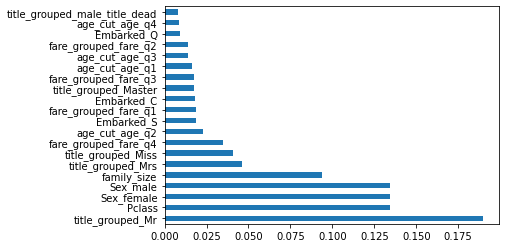

In [39]:
#visualize top 20 features the model is using to predict survival
best_rfc = best_clf_rfc.best_estimator_.fit(x_train_scaled,y_train)

feat_importances = pd.Series(best_rfc.feature_importances_, index=feature_list)
feat_importances.nlargest(20).plot(kind='barh')

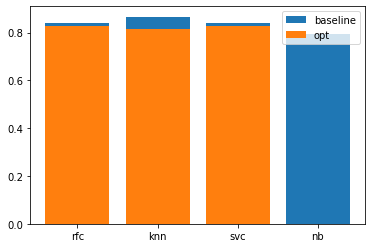

In [40]:
#compare baseline and opt scores
baseline_scores = [rfc_score, knn_score, svc_score, nb_score]
opt_scores = [best_clf_rfc.best_score_, best_clf_knn.best_score_, best_clf_svc.best_score_, 0]
#scores = {'Base':baseline_scores, 'opt':opt_scores}
scores=pd.DataFrame({'baseline':baseline_scores,
                    'opt':opt_scores,
                    'model':['rfc', 'knn', 'svc', 'nb']})
plt.bar(scores.model, scores.baseline)
plt.bar(scores.model, scores.opt)
plt.legend(['baseline', 'opt'])

In [41]:
predictions_rfc = rfc.predict(x_test_scaled).astype(int)
predictions_best_rfc = best_clf_rfc.predict(x_test_scaled).astype(int)
predictions_knn = knn.predict(x_test_scaled).astype(int)
predictions_best_knn = best_clf_rfc.predict(x_test_scaled).astype(int)

In [42]:
output = []
output = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':predictions_rfc})
output.to_csv('submission_rfc.csv', index=False)

output2 = []
output2 = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':predictions_best_rfc})
output2.to_csv('submission_best_rfc.csv', index=False)

output3 = []
output3 = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':predictions_knn})
output3.to_csv('submission_knn.csv', index=False)

output4 = []
output4 = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':predictions_best_knn})
output4.to_csv('submission_best_knn.csv', index=False)
output4.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
